In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

data = pd.read_csv(r"C:\Users\SHIN Soyeon\Desktop\EDA Project\Dataset\kospi_data.csv")
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = [x.month for x in data['Date']]
data['Year'] = [x.year for x in data['Date']]
data['Day'] = [x.day for x in data['Date']]
data

'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'sudo'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
'rm'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


,Date,Close,Open,High,Low,Volume,Change,Month,Year,Day
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,5,1981,1
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,5,1981,2
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,5,1981,4
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,5,1981,6
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,5,1981,7
...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,8,2022,25
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,8,2022,26
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,8,2022,29
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,8,2022,30


In [37]:
from matplotlib import rc
import platform

if platform.system() == 'Windows':
    rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    rc('font', family='AppleGothic')
else: #linux
    rc('font', family='NanumGothic')
    
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 현상 해결 코드

# 로그수익률

In [38]:
data['Close_lag'] = data['Close'].shift(1)
data['Log_Rate'] = np.log(data['Close']/data['Close_lag'])
data

,Date,Close,Open,High,Low,Volume,Change,Month,Year,Day,Close_lag,Log_Rate
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,5,1981,1,NaN,NaN
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,5,1981,2,123.60,-0.000809
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,5,1981,4,123.50,-0.023762
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,5,1981,6,120.60,0.000829
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,5,1981,7,120.70,-0.011667
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,8,2022,25,2447.45,0.012106
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,8,2022,26,2477.26,0.001521
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,8,2022,29,2481.03,-0.022063
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,8,2022,30,2426.89,0.009857


In [39]:
a = pd.DataFrame({'Year':data['Year'], 'Month':data['Month'], 'log_rate':data['Log_Rate']}).drop_duplicates(['Year', 'Month'])
rate = data.groupby(['Year', 'Month'])['Log_Rate'].sum()
a['Monthly_Rate'] = list(rate)
a

,Year,Month,log_rate,Monthly_Rate
0,1981,5,NaN,0.021609
24,1981,6,0.000791,0.177294
49,1981,7,0.036462,-0.018067
75,1981,8,0.001350,-0.055531
100,1981,9,0.002139,-0.057284
...,...,...,...,...
10919,2022,4,-0.006476,-0.022962
10940,2022,5,-0.002824,-0.003401
10961,2022,6,-0.010070,-0.141015
10981,2022,7,-0.011738,0.049699


# 월별 수익률

In [40]:
b = pd.DataFrame(a.groupby('Month')['Monthly_Rate'].mean()).reset_index()
b

,Month,Monthly_Rate
0,1,0.015567
1,2,-0.004169
2,3,0.016201
3,4,0.009723
4,5,-0.000364
5,6,-0.002342
6,7,0.019596
7,8,-0.015013
8,9,-0.004984
9,10,-0.001550


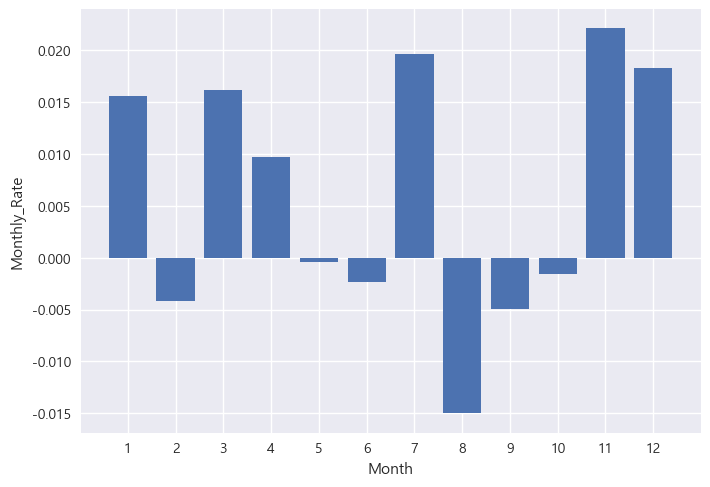

In [41]:
plt.bar(b['Month'], b['Monthly_Rate'])
plt.xticks(b['Month'])
plt.xlabel('Month')
plt.ylabel('Monthly_Rate')
plt.grid(visible=True, axis = 'y')
plt.style.use('seaborn')
plt.show()

In [42]:
dec = data[data['Month']==12]
dec

,Date,Close,Open,High,Low,Volume,Change,Month,Year,Day,Close_lag,Log_Rate
174,1981-12-01,131.40,131.40,131.40,131.40,695000.0,-0.0076,12,1981,1,132.40,-0.007582
175,1981-12-02,130.20,130.20,130.20,130.20,587000.0,-0.0091,12,1981,2,131.40,-0.009174
176,1981-12-03,130.90,130.90,130.90,130.90,738000.0,0.0054,12,1981,3,130.20,0.005362
177,1981-12-04,130.70,130.70,130.70,130.70,664000.0,-0.0015,12,1981,4,130.90,-0.001529
178,1981-12-05,130.10,130.10,130.10,130.10,387000.0,-0.0046,12,1981,5,130.70,-0.004601
...,...,...,...,...,...,...,...,...,...,...,...,...
10855,2021-12-24,3012.43,3009.48,3025.77,3009.48,537550000.0,0.0048,12,2021,24,2998.17,0.004745
10856,2021-12-27,2999.55,3013.94,3017.31,2999.30,475360000.0,-0.0043,12,2021,27,3012.43,-0.004285
10857,2021-12-28,3020.24,3006.77,3020.29,2991.55,607050000.0,0.0069,12,2021,28,2999.55,0.006874
10858,2021-12-29,2993.29,3002.90,3007.72,2988.67,545830000.0,-0.0089,12,2021,29,3020.24,-0.008963


# 12월 일별 수익률

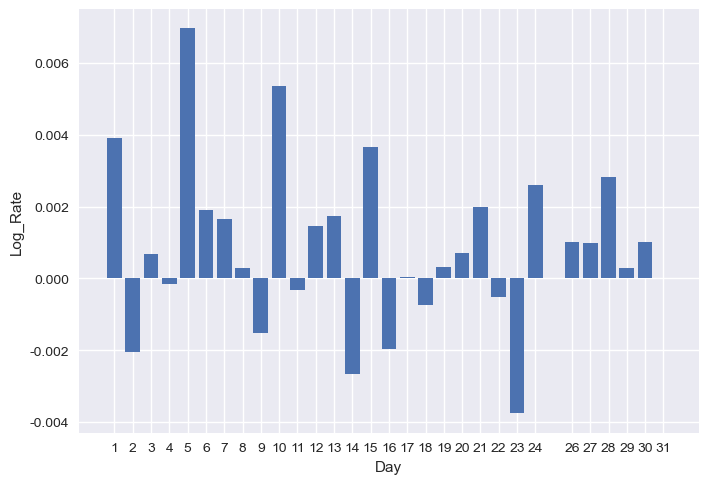

In [43]:
a = pd.DataFrame(dec.groupby(['Day'])['Log_Rate'].mean()).reset_index()
x= a['Day']
y= a['Log_Rate']

plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Day')
plt.ylabel('Log_Rate')
plt.grid(visible=True, axis = 'y')
plt.style.use('seaborn')
plt.show()

# 12월 3분기로 나누기

In [44]:
temp=[]

for x in data['Day']:
  if x < 10:
    temp.append(1)
  elif x < 22:
    temp.append(2)
  elif x < 29: 
    temp.append(3)
  else:
    temp.append(None)
data['Month_third'] = temp
data

,Date,Close,Open,High,Low,Volume,Change,Month,Year,Day,Close_lag,Log_Rate,Month_third
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,5,1981,1,NaN,NaN,1.0
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,5,1981,2,123.60,-0.000809,1.0
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,5,1981,4,123.50,-0.023762,1.0
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,5,1981,6,120.60,0.000829,1.0
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,5,1981,7,120.70,-0.011667,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,8,2022,25,2447.45,0.012106,3.0
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,8,2022,26,2477.26,0.001521,3.0
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,8,2022,29,2481.03,-0.022063,NaN
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,8,2022,30,2426.89,0.009857,NaN


In [47]:
dec = data[data['Month']==12]

dec_f = dec[dec['Day']<=14]
dec_f['Up'] = (dec_f['Log_Rate'] >= 0)

dec_s = dec[(dec['Day']<29) & (dec['Day']>14)]
dec_s['Up'] = dec_s['Log_Rate'] >= 0

print(np.sum(dec_f['Up']), np.sum(dec_s['Up']))

239 214


C:\Users\SHIN Soyeon\AppData\Local\Temp\ipykernel_9568\2620873172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_f['Up'] = (dec_f['Log_Rate'] >= 0)
C:\Users\SHIN Soyeon\AppData\Local\Temp\ipykernel_9568\2620873172.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_s['Up'] = dec_s['Log_Rate'] >= 0


In [48]:
a = pd.DataFrame(dec.groupby(['Year', 'Month_third'])['Log_Rate'].sum()).reset_index()
a

,Year,Month_third,Log_Rate
0,1981,1.0,-0.018293
1,1981,2.0,-0.009274
2,1981,3.0,0.019224
3,1982,1.0,0.029325
4,1982,2.0,-0.002831
...,...,...,...
118,2020,2.0,0.008377
119,2020,3.0,0.010721
120,2021,1.0,0.064965
121,2021,2.0,-0.018167


In [50]:
graph = pd.DataFrame(a.groupby('Month_third')['Log_Rate'].mean()).reset_index()
graph

,Month_third,Log_Rate
0,1.0,0.009036
1,2.0,0.007493
2,3.0,0.001347


In [53]:
graph.columns

Index(['Month_third', 'Log_Rate'], dtype='object')

Text(0, 0.5, 'Log of December Change')

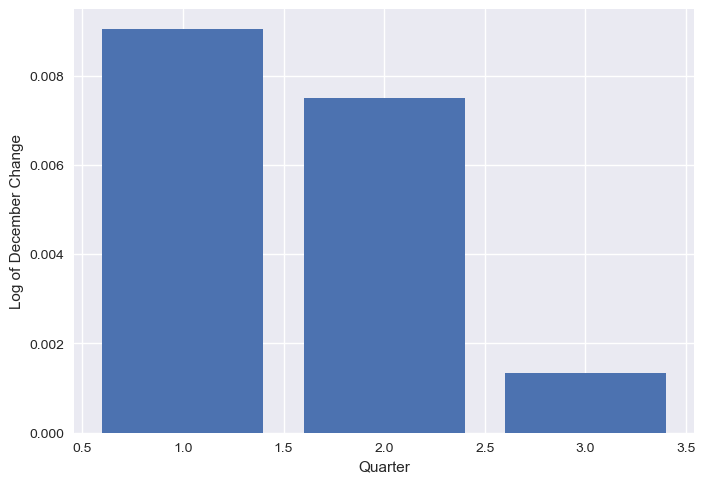

In [58]:
plt.bar(graph['Month_third'], graph['Log_Rate'])
plt.xlabel('Quarter')
plt.ylabel('Log of December Change')